#4.(I) K-Means

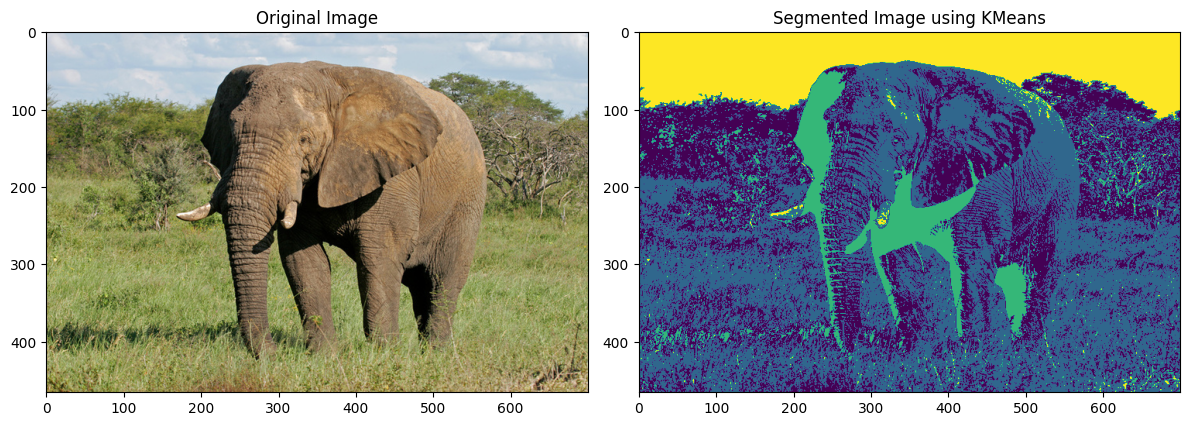

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def kmeans(X, k, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return labels, centroids

# Read the image
image_path = "/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/elephant.jpg"
image = io.imread(image_path)

# Flatten the image
image_flat = image.reshape((-1, 3))

# Number of clusters (adjust as needed)
k = 4

# Apply your custom k-means clustering
labels, centers = kmeans(image_flat, k)

# Reshape the labels to the shape of the original image
segmented_image = labels.reshape(image.shape[:2])

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using KMeans')

plt.tight_layout()
plt.show()


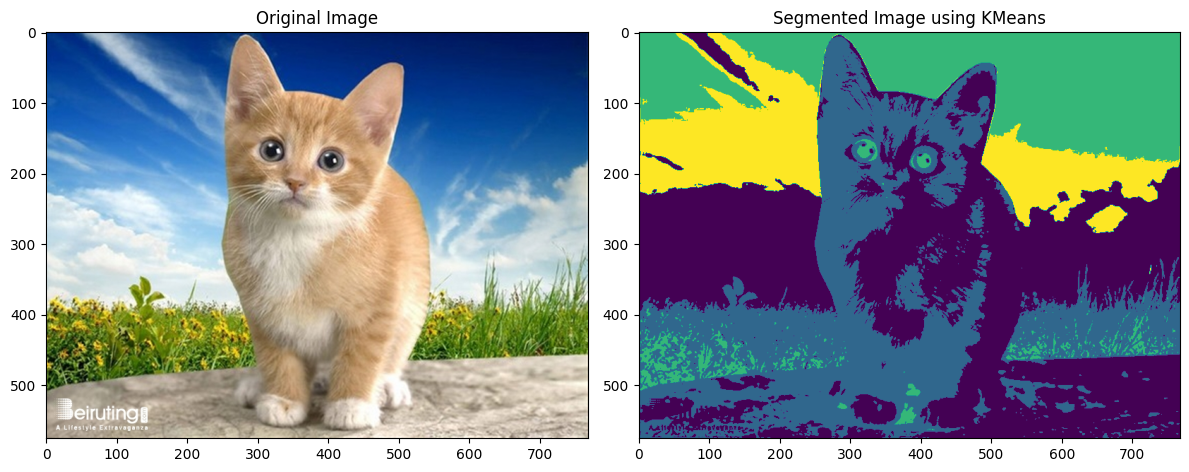

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def kmeans(X, k, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids based on the mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return labels, centroids

# Read the image
image_path = "/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/cat1.jpg"
image = io.imread(image_path)

# Flatten the image
image_flat = image.reshape((-1, 3))

# Number of clusters (adjust as needed)
k = 4

# Apply your custom k-means clustering
labels, centers = kmeans(image_flat, k)

# Reshape the labels to the shape of the original image
segmented_image = labels.reshape(image.shape[:2])

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using KMeans')

plt.tight_layout()
plt.show()


#4.(I) GMM

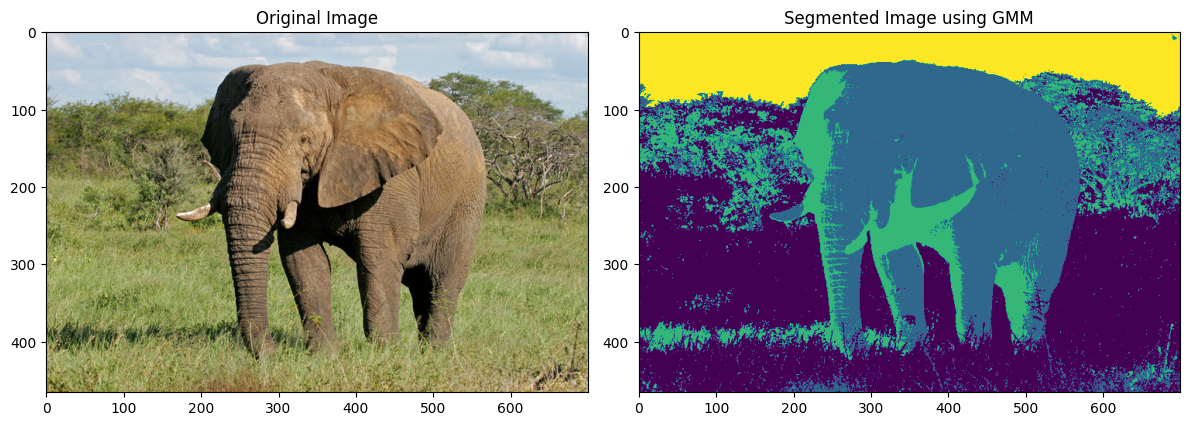

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.stats import multivariate_normal

def initialize_parameters(data, n_components):
    n_samples, n_features = data.shape
    # Randomly initialize means and covariances
    means = data[np.random.choice(n_samples, n_components, replace=False)]
    covariances = [np.cov(data.T) for _ in range(n_components)]
    # Initialize equal weights
    weights = np.ones(n_components) / n_components
    return means, covariances, weights

def expectation(data, means, covariances, weights):
    n_components = len(means)
    n_samples = data.shape[0]
    responsibilities = np.zeros((n_samples, n_components))

    for i in range(n_components):
        responsibilities[:, i] = weights[i] * multivariate_normal.pdf(data, mean=means[i], cov=covariances[i])

    # Normalize responsibilities
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    return responsibilities

def maximization(data, responsibilities):
    n_samples, n_components = responsibilities.shape
    weights = responsibilities.sum(axis=0) / n_samples
    means = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0)[:, np.newaxis]

    covariances = []

    for i in range(n_components):
        diff = data - means[i]
        cov = np.dot(responsibilities[:, i] * diff.T, diff) / responsibilities[:, i].sum()
        covariances.append(cov)

    return means, covariances, weights

def fit_gmm(data, n_components, n_iterations=100, tol=1e-4):
    means, covariances, weights = initialize_parameters(data, n_components)

    for _ in range(n_iterations):
        old_means, old_covariances, old_weights = means.copy(), covariances.copy(), weights.copy()

        responsibilities = expectation(data, means, covariances, weights)
        means, covariances, weights = maximization(data, responsibilities)

        # Check for convergence
        if np.linalg.norm(means - old_means) < tol and np.linalg.norm(weights - old_weights) < tol:
            break

    labels = np.argmax(responsibilities, axis=1)
    return labels, means

# Read an image
image = io.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/elephant.jpg')

# Flatten the image
image_flat = image.reshape((-1, 3))  # Assuming it's a color image (3 channels)

# Number of components (adjust as needed)
n_components = 4

# Apply Gaussian Mixture Model (GMM)
labels, means = fit_gmm(image_flat, n_components)

# Reshape the labels to the shape of the original image
segmented_image = labels.reshape(image.shape[:2])

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using GMM')

plt.tight_layout()
plt.show()


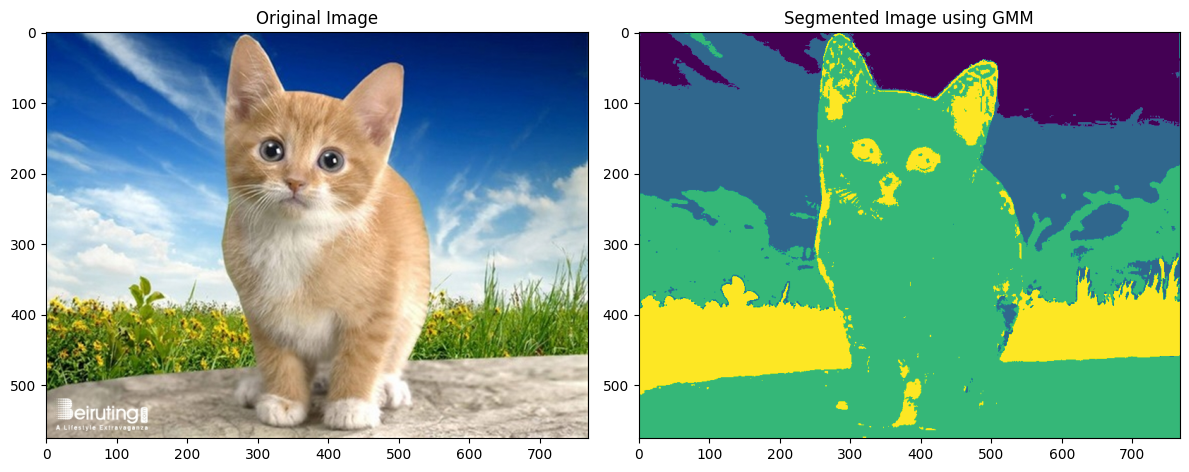

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.stats import multivariate_normal

def initialize_parameters(data, n_components):
    n_samples, n_features = data.shape
    # Randomly initialize means and covariances
    means = data[np.random.choice(n_samples, n_components, replace=False)]
    covariances = [np.cov(data.T) for _ in range(n_components)]
    # Initialize equal weights
    weights = np.ones(n_components) / n_components
    return means, covariances, weights

def expectation(data, means, covariances, weights):
    n_components = len(means)
    n_samples = data.shape[0]
    responsibilities = np.zeros((n_samples, n_components))

    for i in range(n_components):
        responsibilities[:, i] = weights[i] * multivariate_normal.pdf(data, mean=means[i], cov=covariances[i])

    # Normalize responsibilities
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    return responsibilities

def maximization(data, responsibilities):
    n_samples, n_components = responsibilities.shape
    weights = responsibilities.sum(axis=0) / n_samples
    means = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0)[:, np.newaxis]

    covariances = []

    for i in range(n_components):
        diff = data - means[i]
        cov = np.dot(responsibilities[:, i] * diff.T, diff) / responsibilities[:, i].sum()
        covariances.append(cov)

    return means, covariances, weights

def fit_gmm(data, n_components, n_iterations=100, tol=1e-4):
    means, covariances, weights = initialize_parameters(data, n_components)

    for _ in range(n_iterations):
        old_means, old_covariances, old_weights = means.copy(), covariances.copy(), weights.copy()

        responsibilities = expectation(data, means, covariances, weights)
        means, covariances, weights = maximization(data, responsibilities)

        # Check for convergence
        if np.linalg.norm(means - old_means) < tol and np.linalg.norm(weights - old_weights) < tol:
            break

    labels = np.argmax(responsibilities, axis=1)
    return labels, means

# Read an image
image = io.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/cat1.jpg')

# Flatten the image
image_flat = image.reshape((-1, 3))  # Assuming it's a color image (3 channels)

# Number of components (adjust as needed)
n_components = 4

# Apply Gaussian Mixture Model (GMM)
labels, means = fit_gmm(image_flat, n_components)

# Reshape the labels to the shape of the original image
segmented_image = labels.reshape(image.shape[:2])

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using GMM')

plt.tight_layout()
plt.show()


#4.(I) Mean-Shift

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distance / bandwidth)**2))

def mean_shift(data, bandwidth=1.0, max_iterations=10, convergence_tol=1e-4):
    n_samples, n_features = data.shape

    # Randomly initialize the centroids
    centroids = data.copy()

    for _ in range(max_iterations):
        old_centroids = centroids.copy()

        for i in range(n_samples):
            shift = np.zeros_like(centroids[i]).astype(float)  # Convert shift to float

            # Calculate the mean shift for each feature
            for j in range(n_samples):
                distance = euclidean_distance(centroids[i], centroids[j])
                weight = gaussian_kernel(distance, bandwidth)
                shift += weight * data[j]

            shift /= np.sum(weight)

            # Update the centroid
            centroids[i] = shift

        # Check for convergence
        if np.linalg.norm(centroids - old_centroids) < convergence_tol:
            break

    # Assign each point to the nearest centroid
    labels = np.argmin(np.array([euclidean_distance(data, c) for c in centroids]), axis=0)

    return labels, centroids

# Read an image
image = io.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/cat.jpg')

# Flatten the image
image_flat = image.reshape((-1, 3))

# Apply Mean Shift clustering
labels, centroids = mean_shift(image_flat, bandwidth=30)

# Reshape the labels to the shape of the original image
segmented_image = labels.reshape(image.shape[:2])

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using Mean-Shift')

plt.tight_layout()
plt.show()


#4.(II) Min-Cut

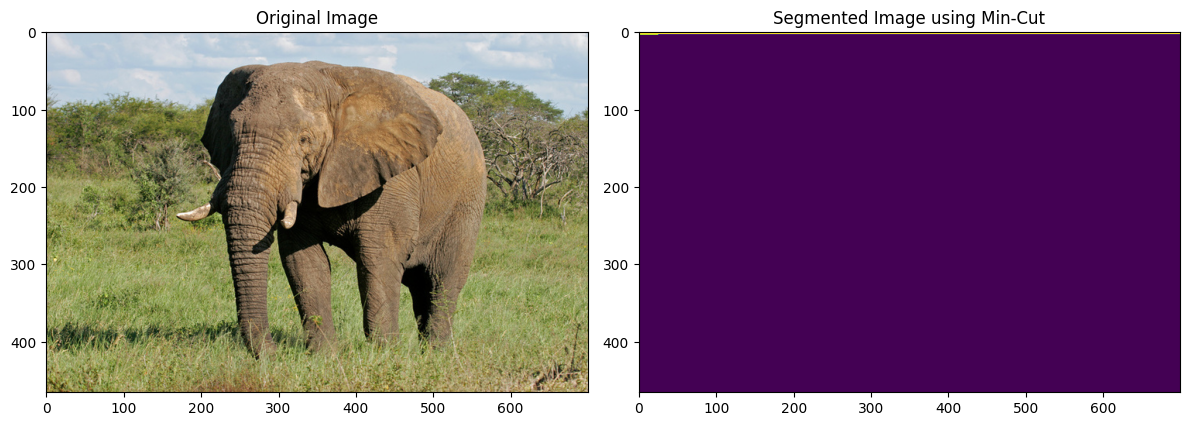

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import io, color

def image_to_graph(image):
    graph = nx.Graph()
    rows, cols = image.shape[:2]

    for i in range(rows):
        for j in range(cols):
            pixel_id = i * cols + j
            graph.add_node(pixel_id, capacity=1)

            if j < cols - 1:
                right_pixel_id = i * cols + (j + 1)
                capacity = np.linalg.norm(image[i, j] - image[i, j + 1])
                graph.add_edge(pixel_id, right_pixel_id, capacity=capacity)

            if i < rows - 1:
                down_pixel_id = (i + 1) * cols + j
                capacity = np.linalg.norm(image[i, j] - image[i + 1, j])
                graph.add_edge(pixel_id, down_pixel_id, capacity=capacity)

    return graph

def min_cut_segmentation(image):
    # Convert the image to grayscale for simplicity
    gray_image = color.rgb2gray(image)

    # Build the graph
    graph = image_to_graph(gray_image)

    # Find the minimum cut using the Ford-Fulkerson algorithm
    cut_value, partition = nx.minimum_cut(graph, 0, (gray_image.shape[0] * gray_image.shape[1] - 1))

    # Extract the segmented region
    segmented_region = np.zeros_like(gray_image)
    for pixel_id, in_source_partition in enumerate(partition[0]):
        i = pixel_id // gray_image.shape[1]
        j = pixel_id % gray_image.shape[1]
        segmented_region[i, j] = 1 if in_source_partition else 0

    return segmented_region

# Read an image
image = io.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/elephant.jpg')

# Apply Min-Cut segmentation
segmented_image = min_cut_segmentation(image)

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using Min-Cut')

plt.tight_layout()
plt.show()


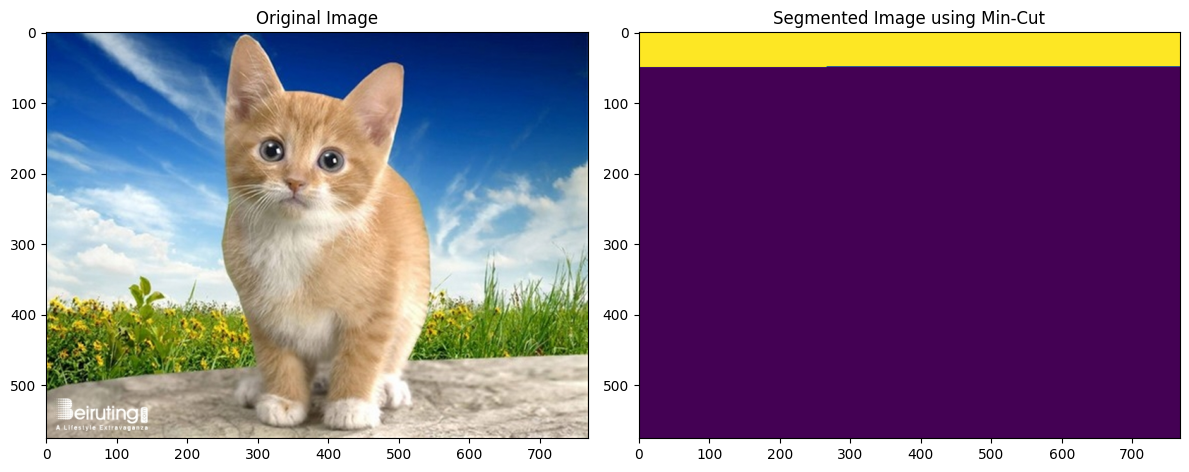

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import io, color

def image_to_graph(image):
    graph = nx.Graph()
    rows, cols = image.shape[:2]

    for i in range(rows):
        for j in range(cols):
            pixel_id = i * cols + j
            graph.add_node(pixel_id, capacity=1)

            if j < cols - 1:
                right_pixel_id = i * cols + (j + 1)
                capacity = np.linalg.norm(image[i, j] - image[i, j + 1])
                graph.add_edge(pixel_id, right_pixel_id, capacity=capacity)

            if i < rows - 1:
                down_pixel_id = (i + 1) * cols + j
                capacity = np.linalg.norm(image[i, j] - image[i + 1, j])
                graph.add_edge(pixel_id, down_pixel_id, capacity=capacity)

    return graph

def min_cut_segmentation(image):
    # Convert the image to grayscale for simplicity
    gray_image = color.rgb2gray(image)

    # Build the graph
    graph = image_to_graph(gray_image)

    # Find the minimum cut using the Ford-Fulkerson algorithm
    cut_value, partition = nx.minimum_cut(graph, 0, (gray_image.shape[0] * gray_image.shape[1] - 1))

    # Extract the segmented region
    segmented_region = np.zeros_like(gray_image)
    for pixel_id, in_source_partition in enumerate(partition[0]):
        i = pixel_id // gray_image.shape[1]
        j = pixel_id % gray_image.shape[1]
        segmented_region[i, j] = 1 if in_source_partition else 0

    return segmented_region

# Read an image
image = io.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/cat1.jpg')

# Apply Min-Cut segmentation
segmented_image = min_cut_segmentation(image)

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using Min-Cut')

plt.tight_layout()
plt.show()


#4.(II)Normalized Min-Cut

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import io, color, filters

def image_to_graph(image):
    graph = nx.Graph()
    rows, cols = image.shape[:2]

    for i in range(rows):
        for j in range(cols):
            pixel_id = i * cols + j

            # Capture intensity and gradient features
            intensity = image[i, j]
            gradient_x = filters.sobel_h(image)[i, j]
            gradient_y = filters.sobel_v(image)[i, j]

            # Feature vector for each pixel
            feature_vector = np.array([intensity, gradient_x, gradient_y])

            graph.add_node(pixel_id, feature_vector=feature_vector, capacity=1)

            if j < cols - 1:
                right_pixel_id = i * cols + (j + 1)
                right_intensity = image[i, j + 1]
                right_gradient_x = filters.sobel_h(image)[i, j + 1]
                right_gradient_y = filters.sobel_v(image)[i, j + 1]

                right_feature_vector = np.array([right_intensity, right_gradient_x, right_gradient_y])

                # Use a distance metric between feature vectors as the edge weight
                weight = np.linalg.norm(feature_vector - right_feature_vector)

                graph.add_edge(pixel_id, right_pixel_id, weight=weight)

            if i < rows - 1:
                down_pixel_id = (i + 1) * cols + j
                down_intensity = image[i + 1, j]
                down_gradient_x = filters.sobel_h(image)[i + 1, j]
                down_gradient_y = filters.sobel_v(image)[i + 1, j]

                down_feature_vector = np.array([down_intensity, down_gradient_x, down_gradient_y])

                # Use a distance metric between feature vectors as the edge weight
                weight = np.linalg.norm(feature_vector - down_feature_vector)

                graph.add_edge(pixel_id, down_pixel_id, weight=weight)

    return graph

def normalized_min_cut_segmentation(image):
    gray_image = color.rgb2gray(image)
    graph = image_to_graph(gray_image)

    # Use normalized cut instead of minimum cut
    partition = nx.algorithms.community.normalized_cut_partition(graph)

    segmented_region = np.zeros_like(gray_image)
    for pixel_id, in_source_partition in enumerate(partition[0]):
        i = pixel_id // gray_image.shape[1]
        j = pixel_id % gray_image.shape[1]
        segmented_region[i, j] = 1 if in_source_partition else 0

    return segmented_region

# Read an image
image = io.imread('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment3/cat.jpg')

# Apply Normalized Min-Cut segmentation
segmented_image = normalized_min_cut_segmentation(image)

# Visualize the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image using Normalized Min-Cut')

plt.tight_layout()
plt.show()
